In [33]:
import pandas as pd
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, \
    HistGradientBoostingRegressor, BaggingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge, \
    SGDRegressor, PassiveAggressiveRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [34]:
DATA_PATH = '../../fingerprints/generators/45FP/45_fingerprints_grouped_avg_energy.csv'


def load_data(path=DATA_PATH):
    return pd.read_csv(path)

In [35]:
loaded_data = load_data()
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9183 entries, 0 to 9182
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MOF                                   9183 non-null   object 
 1   atomic_num_mean                       9183 non-null   float64
 2   atomic_num_geometric_mean             9183 non-null   float64
 3   atomic_num_standard_deviation         9183 non-null   float64
 4   atomic_num_max                        9183 non-null   float64
 5   atomic_num_min                        9183 non-null   float64
 6   group_mean                            9183 non-null   float64
 7   group_geometric_mean                  9183 non-null   float64
 8   group_standard_deviation              9183 non-null   float64
 9   group_max                             9183 non-null   float64
 10  group_min                             9183 non-null   float64
 11  period_mean      

In [36]:
train_set, test_set = train_test_split(loaded_data, test_size=0.2, random_state=42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7346 entries, 5255 to 7270
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MOF                                   7346 non-null   object 
 1   atomic_num_mean                       7346 non-null   float64
 2   atomic_num_geometric_mean             7346 non-null   float64
 3   atomic_num_standard_deviation         7346 non-null   float64
 4   atomic_num_max                        7346 non-null   float64
 5   atomic_num_min                        7346 non-null   float64
 6   group_mean                            7346 non-null   float64
 7   group_geometric_mean                  7346 non-null   float64
 8   group_standard_deviation              7346 non-null   float64
 9   group_max                             7346 non-null   float64
 10  group_min                             7346 non-null   float64
 11  period_mean        

array([[<Axes: title={'center': 'atomic_num_mean'}>,
        <Axes: title={'center': 'atomic_num_geometric_mean'}>,
        <Axes: title={'center': 'atomic_num_standard_deviation'}>,
        <Axes: title={'center': 'atomic_num_max'}>,
        <Axes: title={'center': 'atomic_num_min'}>,
        <Axes: title={'center': 'group_mean'}>,
        <Axes: title={'center': 'group_geometric_mean'}>],
       [<Axes: title={'center': 'group_standard_deviation'}>,
        <Axes: title={'center': 'group_max'}>,
        <Axes: title={'center': 'group_min'}>,
        <Axes: title={'center': 'period_mean'}>,
        <Axes: title={'center': 'period_geometric_mean'}>,
        <Axes: title={'center': 'period_standard_deviation'}>,
        <Axes: title={'center': 'period_max'}>],
       [<Axes: title={'center': 'period_min'}>,
        <Axes: title={'center': 'electronegativity_mean'}>,
        <Axes: title={'center': 'electronegativity_geometric_mean'}>,
        <Axes: title={'center': 'electronegativity_s

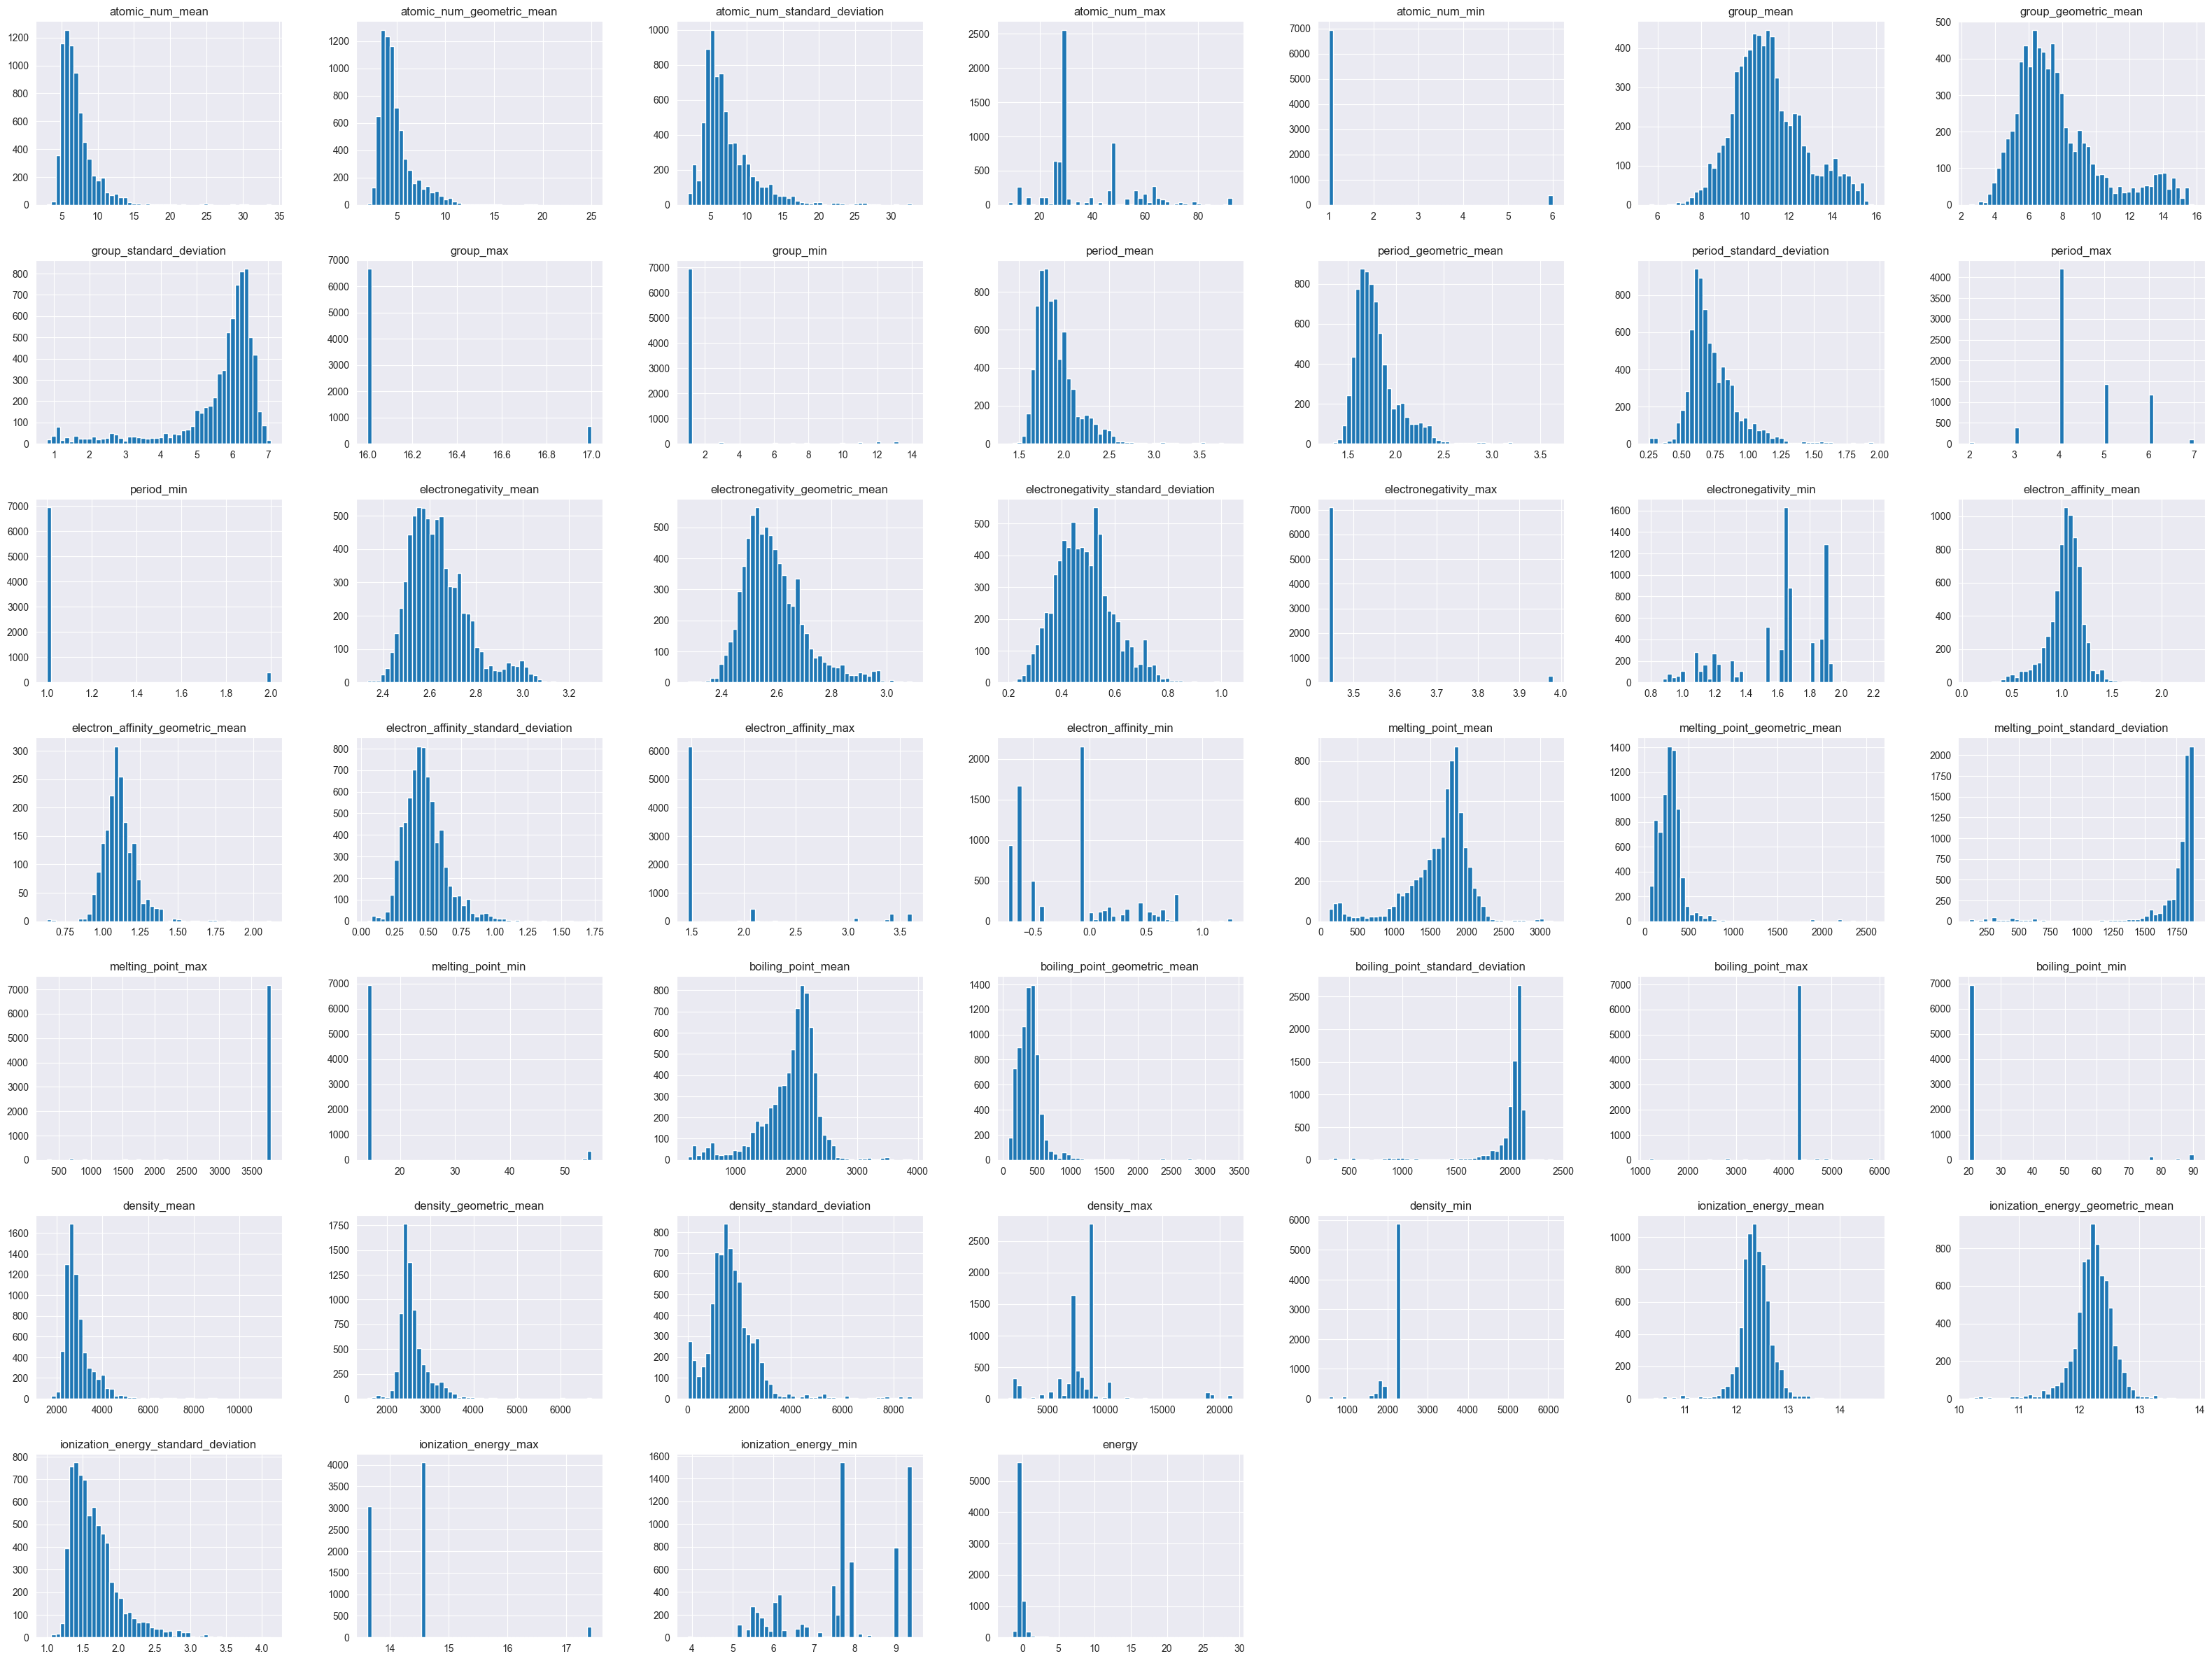

In [37]:
data = train_set.copy()
data.hist(bins=50, figsize=(40, 30))

In [38]:
print(data.head())

                 MOF  atomic_num_mean  atomic_num_geometric_mean  \
5255    PENXUC_w_H2O         7.747126                   4.874712   
6994    UVOBUE_w_CO2        11.582418                   6.962484   
3153  JIXWUJ01_w_CO2         7.873874                   5.409850   
2232    GEWXAJ_w_CO2         6.397351                   4.367027   
1922    FIRNOL_w_CO2         5.609195                   4.263431   

      atomic_num_standard_deviation  atomic_num_max  atomic_num_min  \
5255                       6.357579            23.0             1.0   
6994                      14.368820            58.0             1.0   
3153                       6.536270            25.0             1.0   
2232                       5.949099            29.0             1.0   
1922                       3.868102            28.0             1.0   

      group_mean  group_geometric_mean  group_standard_deviation  group_max  \
5255   10.229885              6.161157                  6.768251       17.0   
6994  

In [39]:
data = data.drop("MOF", axis=1)
corr_matrix = data.corr()
corr_matrix["energy"].sort_values(ascending=False)

energy                                  1.000000
melting_point_geometric_mean            0.131458
boiling_point_geometric_mean            0.130996
melting_point_min                       0.098606
period_min                              0.098239
group_min                               0.095776
atomic_num_min                          0.095774
boiling_point_min                       0.092877
group_geometric_mean                    0.086169
period_geometric_mean                   0.083055
period_mean                             0.079745
atomic_num_geometric_mean               0.075765
group_mean                              0.074536
atomic_num_mean                         0.072265
boiling_point_mean                      0.058885
atomic_num_standard_deviation           0.056980
melting_point_mean                      0.053331
density_mean                            0.037645
period_standard_deviation               0.036093
atomic_num_max                          0.034522
density_standard_dev

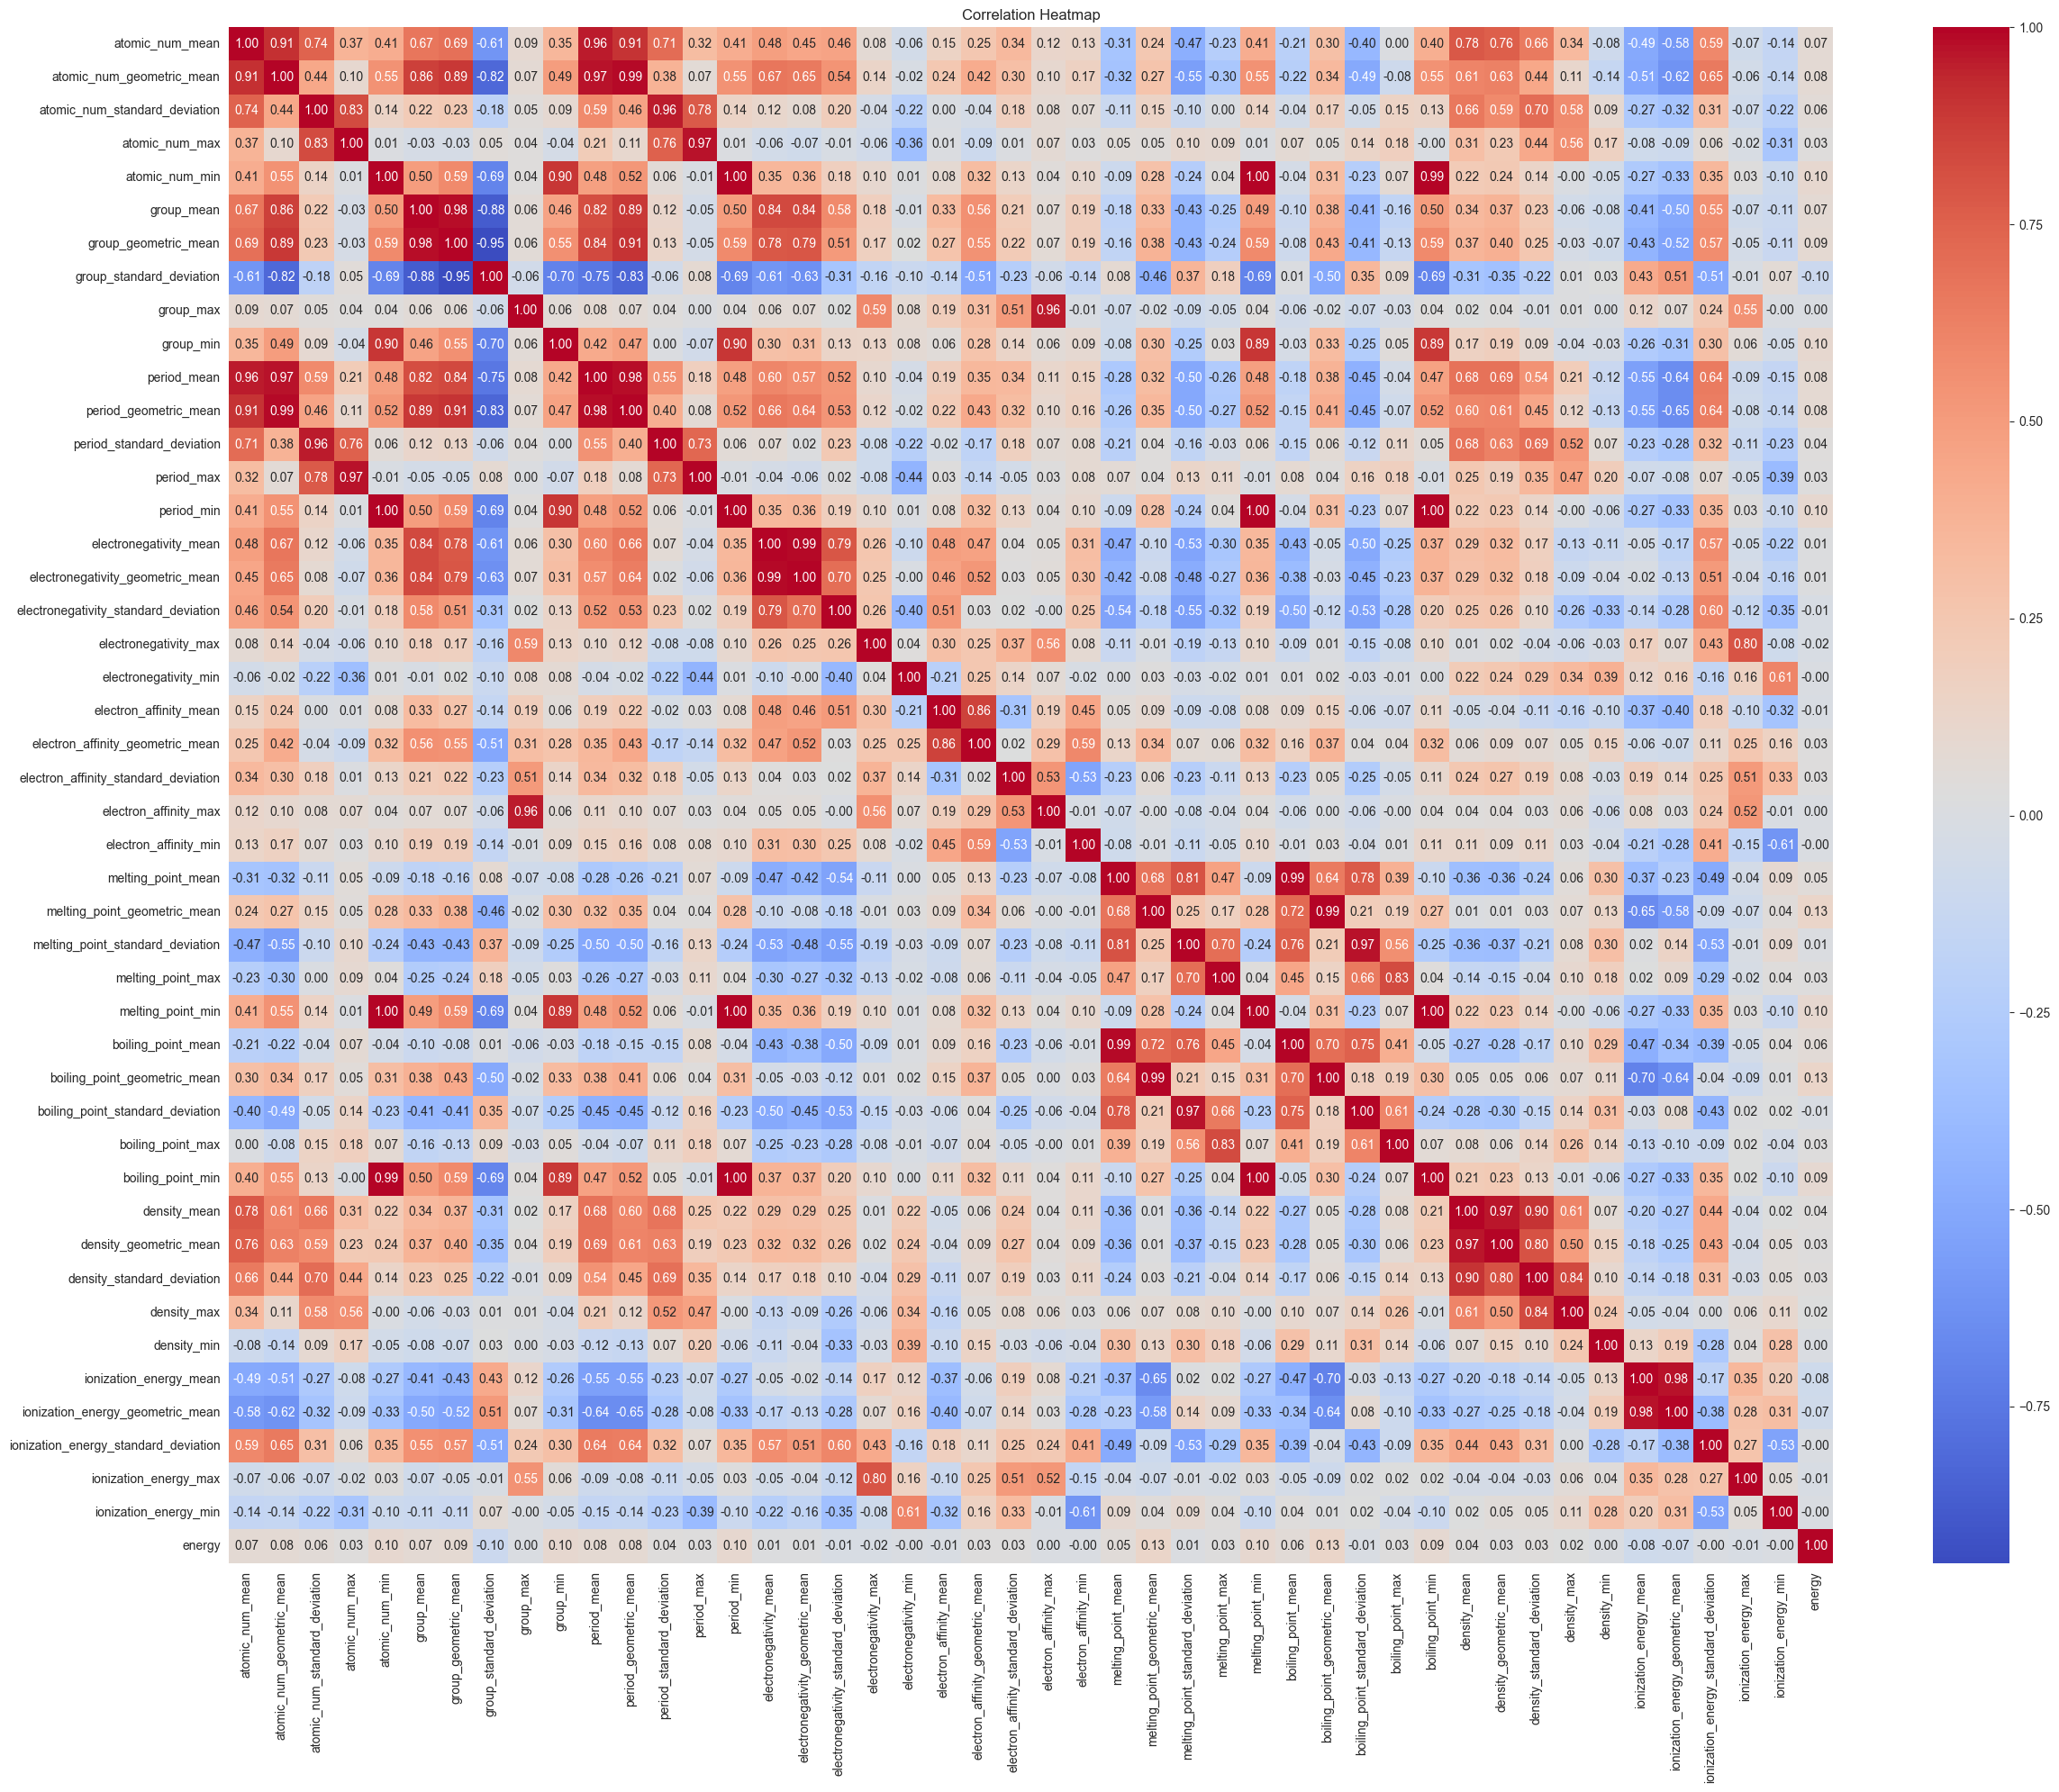

In [40]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [41]:
X_train = data.drop(columns=["energy"])
Y_train = data["energy"]

In [42]:
# imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='constant', fill_value=0)

pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())
])

X_train_transformed = pipeline.fit_transform(X_train)

In [43]:
models = {
    "LinearRegression": LinearRegression(),
    # "Ridge": Ridge(),
    # "Lasso": Lasso(),
    # "SGD": SGDRegressor(max_iter=1000, tol=1e-3),

    # "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    # "SVR": SVR(),

    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Bagging": BaggingRegressor(n_estimators=100, random_state=42),

    # "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
}

In [44]:
X_test = test_set.drop(columns=["energy"])
Y_test = test_set["energy"]

X_test = X_test.drop("MOF", axis=1)

X_test_transformed = pipeline.transform(X_test)

In [45]:
preds = {}

for name, model in models.items():
    model.fit(X_train_transformed, Y_train)
    pred = model.predict(X_test_transformed)
    preds[name] = pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7222
[LightGBM] [Info] Number of data points in the train set: 7346, number of used features: 45
[LightGBM] [Info] Start training from score -0.139444


C:\Users\GED\PycharmProjects\Aixelo_Project_DataLab_2025\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [46]:
mse_scores = {}
mae_scores = {}

def print_error(name, y_pred):
    print('---------------------------------------------------------\n')
    print(f'Model: {name}')
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)

    mse_scores[name] = mse
    mae_scores[name] = mae

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2 * 100:.2f}%")

In [47]:
for name, pred in preds.items():
    print_error(name, pred)

---------------------------------------------------------

Model: LinearRegression
Mean Absolute Error (MAE): 0.32155800896396447
Mean Squared Error (MSE): 0.5962277396798789
Root Mean Squared Error (RMSE): 0.7721578463500056
R² Score: -1.71%
---------------------------------------------------------

Model: RandomForest
Mean Absolute Error (MAE): 0.2859599192561986
Mean Squared Error (MSE): 0.5481612570016556
Root Mean Squared Error (RMSE): 0.7403791305822008
R² Score: 6.49%
---------------------------------------------------------

Model: ExtraTrees
Mean Absolute Error (MAE): 0.2672849186412423
Mean Squared Error (MSE): 0.4977939371923659
Root Mean Squared Error (RMSE): 0.7055451347662783
R² Score: 15.08%
---------------------------------------------------------

Model: HistGradientBoosting
Mean Absolute Error (MAE): 0.30866412442126273
Mean Squared Error (MSE): 0.5414940820815938
Root Mean Squared Error (RMSE): 0.735862814715891
R² Score: 7.63%
---------------------------------------

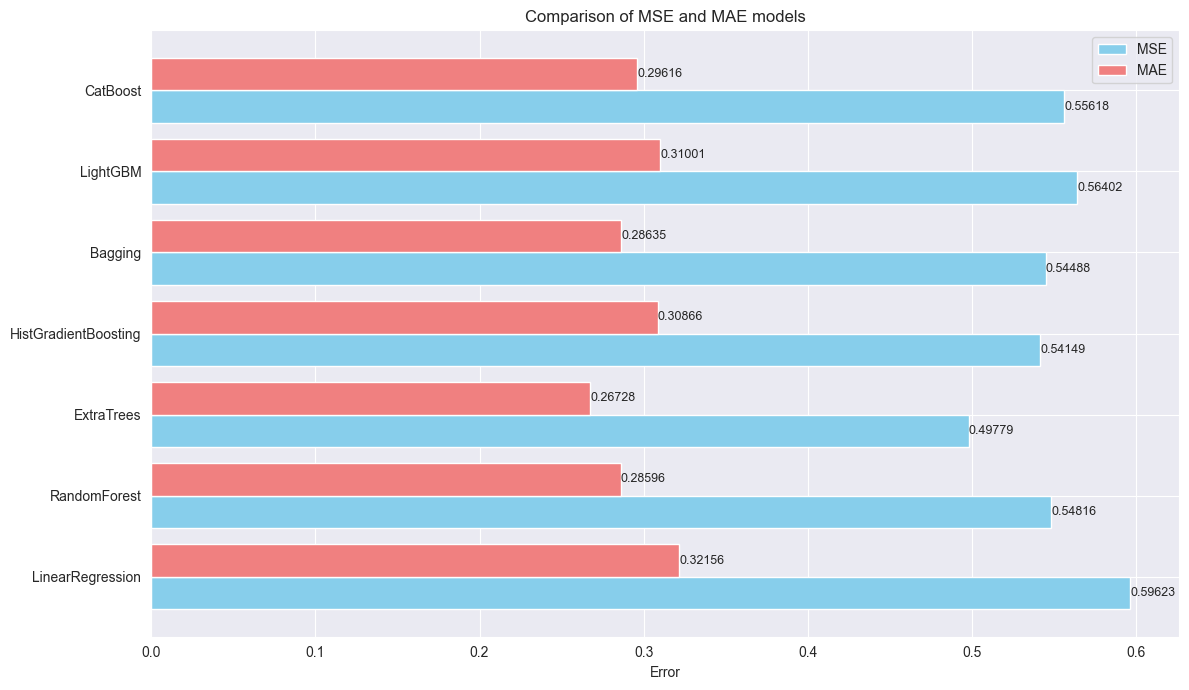

In [48]:
plt.figure(figsize=(12, 7))

bar_width = 0.4
indices = np.arange(len(mse_scores))

plt.barh(indices - bar_width/2, list(mse_scores.values()), bar_width, label='MSE', color='skyblue')
plt.barh(indices + bar_width/2, list(mae_scores.values()), bar_width, label='MAE', color='lightcoral')

plt.yticks(indices, list(mse_scores.keys()))
plt.xlabel('Error')
plt.title('Comparison of MSE and MAE models')
plt.legend()

for i, (mse, mae) in enumerate(zip(mse_scores.values(), mae_scores.values())):
    plt.text(mse, i - bar_width/2, f"{mse:.5f}", va='center', ha='left', fontsize=9)
    plt.text(mae, i + bar_width/2, f"{mae:.5f}", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()